# CAP 5768 - Data Science - Dr. Marques - Fall 2019

# Assignment 1: The Python data science stack 

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [35]:
file = 'data/president_heights.csv'
presidents = pd.read_csv(file) 
presidents.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


### Write code to display the histogram (4 pts) of president's heights and compute summary statistics: 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

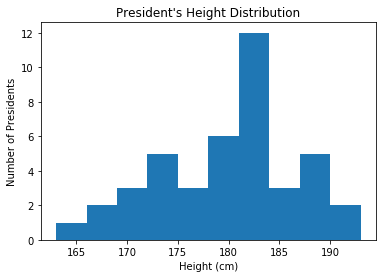

In [3]:
# Display Histogram of the President's Heights
height = np.array(presidents['height(cm)'])
plt.hist(height)
plt.title("President's Height Distribution")
plt.xlabel('Height (cm)')
plt.ylabel('Number of Presidents');

In [4]:
# Summary Statistics 
print("President's Height statistics:")
print("\tMean Height:", np.round(np.mean(height),decimals=2))
print("\tStandard Deviation:", np.round(np.std(height),decimals=2))
print("\tMinimum Height:", np.min(height))
print("\tMaximum Height:", np.max(height))
print("\nNote: Using numPy round() method to round to two decimal place")

President's Height statistics:
	Mean Height: 179.74
	Standard Deviation: 6.93
	Minimum Height: 163
	Maximum Height: 193

Note: Using numPy round() method to round to two decimal place


### Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [5]:
# Put all of the president's name in numpy array
# Use where() to find the index matches the condition or use boolean mask

names = np.array(presidents['name'])

# Using np.where()
tallestIndex = np.where(height == np.max(height))
print("1. The tallest president(s) was(were): ", ', '.join(names[tallestIndex[0]]))

# Using Boolean Mask
print("2. The shortest president(s) was(were): ", ', '.join(names[height == np.min(height)]))

# Get index then use array size
sixFeet = np.where((height / 30.48) >= 6)
print("3. Total number of president's who were 6' tall or taller:", sixFeet[0].size)

print("\nNote: Using .join() to format the array to print without going through a loop")

1. The tallest president(s) was(were):  Abraham Lincoln, Lyndon B. Johnson
2. The shortest president(s) was(were):  James Madison
3. Total number of president's who were 6' tall or taller: 18

Note: Using .join() to format the array to print without going through a loop


-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

### Write Python code to test hypothesis H1.

## Solution

In [6]:
            ### When dealing with no missing values in data ### 
    
# numPy indexing (slices) array[start:stop:step] then use mean() to find the average
# Note: index and numbered referring two different values => index (array) = numbered (excel) + 1 
# ==> odd and even swap when calculating using indexes (index 0 is numbered 1 president)

# evenAverage = np.mean(height[1:height.size:2])
# print("Even-numbered presidents average height: ", np.round(evenAverage,decimals=2))

# oddAverage = np.mean(height[0:height.size:2])
# print("Odd-numbered presidents average height: ", np.round(oddAverage,decimals=2))

In [7]:
            ### President's numbered 22 and 24 are missing in the given data ###

order = np.array(presidents['order'])

# Using np.where()
evenNumberedIndex = np.where((order % 2) == 0)
evenAverage = np.mean(height[evenNumberedIndex])
print("Even-numbered presidents average height(cm): ", np.round(evenAverage,decimals=2))

# Using Boolean Mask
oddAverage = np.mean(height[(order % 2) != 0])
print("Odd-numbered presidents average height(cm): ", np.round(oddAverage,decimals=2))

Even-numbered presidents average height(cm):  179.6
Odd-numbered presidents average height(cm):  179.86


### Was hypothesis H1 confirmed or refuted?

## Solution

Hypothesis H1 was "refuted" since the average height of even-numbered presidents is 179.60 cm while the average height of odd-numbered presidents is 179.86 cm which is higher by 0.26 cm

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

### Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [8]:
print("'H2: If we were to divide the presidents into two groups (first half and the second half) in")
print("the dataset and calculate for the total height, the value of the second group will be higher'\n")

# Using numPy indexing (slices): array[start:stop:step] 

firstHalf = np.sum(height[0:int(height.size/2):1])
print("Total height(cm) of the first half: ", firstHalf)

secondHalf = np.sum(height[int(height.size/2):height.size:1])
print("Total height(cm) of the second half: ", secondHalf)

print("\nConclusion: The hypothesis H2 confirmed with the value of the")
print("first half is", firstHalf, "while the second half is", secondHalf)

'H2: If we were to divide the presidents into two groups (first half and the second half) in
the dataset and calculate for the total height, the value of the second group will be higher'

Total height(cm) of the first half:  3740
Total height(cm) of the second half:  3809

Conclusion: The hypothesis H2 confirmed with the value of the
first half is 3740 while the second half is 3809


-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [9]:
salaries = pd.read_csv('data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

The meaning of each of the six variables/features stored along the columns of the dataset are:
- earn: annual salary of an individual (numerical)
- height: height of an individual in inches(numerical)
- sex: sex of an individual (categorical)
- ed: years of education (numerical)
- age: age of an individual (numerical)
- race:  race of an individual (categorical)


--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [10]:
salary = np.array(salaries['earn'])
print("Salary statistics:")
print("Minimum salary (global):", np.round(np.min(salary),decimals=2))
print("Maximum salary (global):", np.round(np.max(salary),decimals=2))
print("Average salary (global):", np.round(np.mean(salary),decimals=2))
print("Median  salary (global):", np.round(np.median(salary),decimals=2))

Salary statistics:
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.77
Median  salary (global): 20000.0


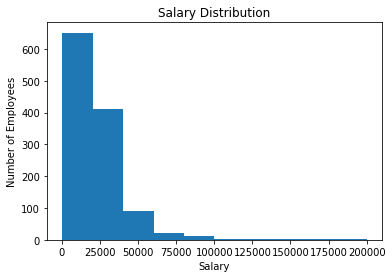

In [11]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

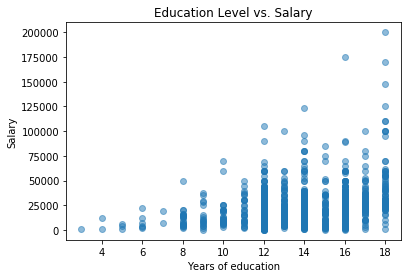

In [12]:
years = np.array(salaries['ed'])
# plt.title('Salary vs. Education Level')
# plt.xlabel('Salary')
# plt.ylabel('Years of education');
# plt.scatter(salary, years, alpha=0.5)

# Flipped the axes so the scatterplot looks better
plt.title('Education Level vs. Salary')
plt.xlabel('Years of education')
plt.ylabel('Salary');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [13]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894845


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### Write code to:

1. Display the total headcount and the number (and %) of male and female employees.
2. Compute and display the min, max, average, and median salary *per gender*.
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company.

## Solution

In [14]:
# 1. Display the total headcount and the number (and %) of male and female employees (4 pts)
sex = np.array(salaries['sex'])
print("The total headcount is", sex.size)

male = np.where(sex == "male")
maleCount = male[0].size
malePercentage = (maleCount / sex.size) * 100
print("The number of male is", maleCount, "which is", np.round(malePercentage, decimals=2), "%")

female = np.where(sex == "female")
femaleCount = female[0].size
femalePercentage = (femaleCount / sex.size) * 100
print("The number of female is", femaleCount, "which is", np.round(femalePercentage, decimals=2), "%")

The total headcount is 1192
The number of male is 505 which is 42.37 %
The number of female is 687 which is 57.63 %


In [15]:
# 2.Compute and display the min, max, average, and median salary per gender (12 pts)

print("Male Statistics: ")
print("\tMinimum salary:", np.round(np.min(salary[male]),decimals=2))
print("\tMaximum salary:", np.round(np.max(salary[male]),decimals=2))
print("\tAverage salary:", np.round(np.mean(salary[male]),decimals=2))
print("\tMedian  salary:", np.round(np.median(salary[male]),decimals=2))

print("\nFemale Statistics: ")
print("\tMinimum salary:", np.round(np.min(salary[female]),decimals=2))
print("\tMaximum salary:", np.round(np.max(salary[female]),decimals=2))
print("\tAverage salary:", np.round(np.mean(salary[female]),decimals=2))
print("\tMedian  salary:", np.round(np.median(salary[female]),decimals=2))


Male Statistics: 
	Minimum salary: 1000.0
	Maximum salary: 200000.0
	Average salary: 29786.13
	Median  salary: 25000.0

Female Statistics: 
	Minimum salary: 200.0
	Maximum salary: 123000.0
	Average salary: 18280.2
	Median  salary: 15000.0


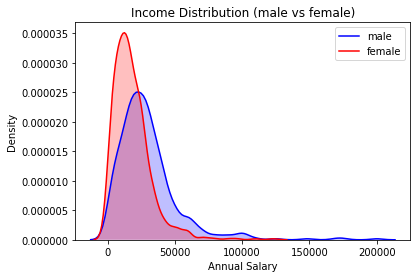

There is gender inequality present in the plot
since the the male has the tail on the right side (tend to have higher pay)


In [16]:
# 3.(OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality 
# (if any is present) associated with the salaries in the company. (<= 16 bonus points)

# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
ax = sns.kdeplot(salary[male], shade=True, color="b", label="male")
ax = sns.kdeplot(salary[female], shade=True, color="r", label="female")

plt.title('Income Distribution (male vs female)')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.show()

print("There is gender inequality present in the plot")
print("since the the male has the tail on the right side (tend to have higher pay)")

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

### Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

'H3: People who are taller than 6 feet earn more salary on average'
	Average salary of those who are taller than 6 feet: $ 27744.94
	Average salary of those who are 6 feet and below: $ 22543.91


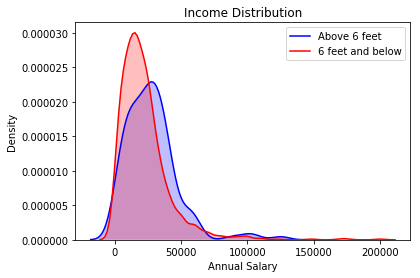

Conclusion: Hypothesis H3 is confirmed based on the calculation and the graph
(The peak of Above 6 feet is on the right of 6 feet and below)


In [17]:
print("'H3: People who are taller than 6 feet earn more salary on average'")

# Note: data value for height is given in inches 
employeeHeight = np.array(salaries['height'])
sixFeet = 6 * 12

sixFeetIndex = np.where(employeeHeight > sixFeet)
sixFeetAvgSalary = np.mean(salary[sixFeetIndex])
print("\tAverage salary of those who are taller than 6 feet: $", np.round(sixFeetAvgSalary,decimals=2))

belowIndex = np.where(employeeHeight <= sixFeet)
belowAvgSalary = np.mean(salary[belowIndex])
print("\tAverage salary of those who are 6 feet and below: $", np.round(belowAvgSalary,decimals=2))

bx = sns.kdeplot(salary[sixFeetIndex], shade=True, color="b", label="Above 6 feet")
bx = sns.kdeplot(salary[belowIndex], shade=True, color="r", label="6 feet and below")

plt.title('Income Distribution')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.show()

print("Conclusion: Hypothesis H3 is confirmed based on the calculation and the graph")
print("(The peak of Above 6 feet is on the right of 6 feet and below)")

'H4: People who are between 30 and 40 of age, on average, earn more salary than the rest'
	Average salary of those who are between 30 and 40: $ 25195.16
	Average salary of those who are below 30 and greater than 40: $ 22243.53


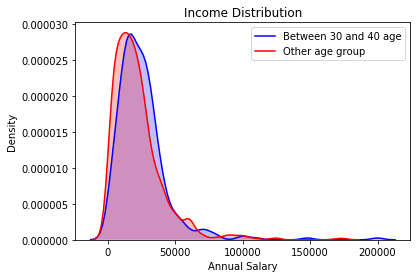

Conclusion: Hypothesis H4 is confirmed based on the calculation and the graph 
(peak of between 30 and 40 age is slightly on the right of Other age group)


In [18]:
print("'H4: People who are between 30 and 40 of age, on average, earn more salary than the rest'")
employeeAge = np.array(salaries['age'])

betweenAgeIndex = np.where((employeeAge >= 30) & (employeeAge <= 40))
betweenAgeAvgSalary = np.mean(salary[betweenAgeIndex])
print("\tAverage salary of those who are between 30 and 40: $", np.round(betweenAgeAvgSalary,decimals=2))

otherAgeIndex = np.where((employeeAge < 30) | (employeeAge > 40))
otherAgeAvgSalary = np.mean(salary[otherAgeIndex ])
print("\tAverage salary of those who are below 30 and greater than 40: $", np.round(otherAgeAvgSalary,decimals=2))

cx = sns.kdeplot(salary[betweenAgeIndex ], shade=True, color="b", label="Between 30 and 40 age")
cx = sns.kdeplot(salary[otherAgeIndex], shade=True, color="r", label="Other age group")

plt.title('Income Distribution')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.show()

print("Conclusion: Hypothesis H4 is confirmed based on the calculation and the graph ")
print("(peak of between 30 and 40 age is slightly on the right of Other age group)")

'H5: People who are older than 45 and at least 17 years of education '
make more than other group on average
	Average salary of those who are > 45 and >= 17 years of education: $ 39040.82
	Average salary of other group: $ 22473.74


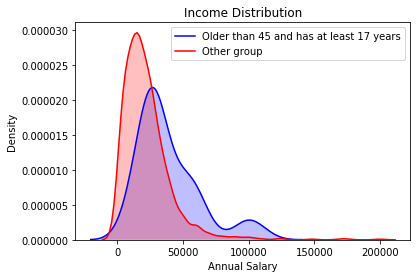

Conclusion: Hypothesis H5 is confirmed based on the calculation
and the graph (the tail of older than 45)


In [19]:
print("'H5: People who are older than 45 and at least 17 years of education '")
print("make more than other group on average")

odderMoreEducationIndex = np.where((employeeAge > 45) & (years >= 17))
odderMoreEducationAvgSalary = np.mean(salary[odderMoreEducationIndex])
print("\tAverage salary of those who are > 45 and >= 17 years of education: $", np.round(odderMoreEducationAvgSalary,decimals=2))

youngerLessEducationInIndex = np.where((employeeAge <= 45) | (years < 17))
youngerLessEducationAvgSalary = np.mean(salary[youngerLessEducationInIndex])
print("\tAverage salary of other group: $", np.round(youngerLessEducationAvgSalary,decimals=2))

dx = sns.kdeplot(salary[odderMoreEducationIndex], shade=True, color="b", label="Older than 45 and has at least 17 years")
dx = sns.kdeplot(salary[youngerLessEducationInIndex ], shade=True, color="r", label="Other group")

plt.title('Income Distribution')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.show()

print("Conclusion: Hypothesis H5 is confirmed based on the calculation")
print("and the graph (the tail of older than 45)")

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [20]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [21]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

In [22]:
shapeAfterDropNa = data.shape
print("Data shape after applied dropna:", shapeAfterDropNa)

Data shape after applied dropna: (392, 9)


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- dropna: drop rows that has missing values

The net effect of the line of code " data.dropna(inplace=True) "  is 14 rows being dropped from out data

### Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [23]:
# 1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
cylinders = np.array(data['cylinders'])

discardCylinders = np.where((cylinders == 3) | (cylinders == 5))
discardCylindersCount = discardCylinders[0].size
print("The number of 3- and 5-cylinder vehicles:", discardCylindersCount)

# Discard entries (rows) that is 3- and 5-cylinder in
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

data.drop(discardCylinders[0], inplace=True)
data.reset_index(drop=True, inplace=True)
shapeAfterDropCylinder = data.shape
print("Data shape after discarded 3- and 5-cylinder vehicles:", shapeAfterDropCylinder)

The number of 3- and 5-cylinder vehicles: 7
Data shape after discarded 3- and 5-cylinder vehicles: (385, 9)


In [24]:
# 2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
mpg = np.array(data['mpg'])
cylinders = np.array(data['cylinders'])

fourCylinders = np.where(cylinders == 4)
print("4 Cylinder Vehicles Statistics: ")
print("\tMinimum MPG:", np.round(np.min(mpg[fourCylinders]),decimals=2))
print("\tMaximum MPG:", np.round(np.max(mpg[fourCylinders]),decimals=2))
print("\tAverage MPG:", np.round(np.mean(mpg[fourCylinders]),decimals=2))

print("\n6 Cylinder Vehicles Statistics: ")
print("\tMinimum MPG:", np.round(np.min(mpg[cylinders == 6]),decimals=2))
print("\tMaximum MPG:", np.round(np.max(mpg[cylinders == 6]),decimals=2))
print("\tAverage MPG:", np.round(np.mean(mpg[cylinders == 6]),decimals=2))

eightCylinders = np.where(cylinders == 8)
print("\n8 Cylinder Vehicles Statistics: ")
print("\tMinimum MPG:", np.round(np.min(mpg[eightCylinders]),decimals=2))
print("\tMaximum MPG:", np.round(np.max(mpg[eightCylinders]),decimals=2))
print("\tAverage MPG:", np.round(np.mean(mpg[eightCylinders]),decimals=2))

4 Cylinder Vehicles Statistics: 
	Minimum MPG: 18.0
	Maximum MPG: 46.6
	Average MPG: 29.25

6 Cylinder Vehicles Statistics: 
	Minimum MPG: 15.0
	Maximum MPG: 38.0
	Average MPG: 19.97

8 Cylinder Vehicles Statistics: 
	Minimum MPG: 9.0
	Maximum MPG: 26.6
	Average MPG: 14.95


In [25]:
# 3.(OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 point)
carName = np.array(data['car_name'])

mostEfficientCar = carName[mpg == np.max(mpg)]
print("Name of the most fuel efficient vehicles in the datase:", ', '.join(mostEfficientCar))

leastEfficientCar = carName[mpg == np.min(mpg)]
print("Name of the least fuel efficient vehicles in the datase:", ', '.join(leastEfficientCar))

Name of the most fuel efficient vehicles in the datase: mazda glc
Name of the least fuel efficient vehicles in the datase: hi 1200d


--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

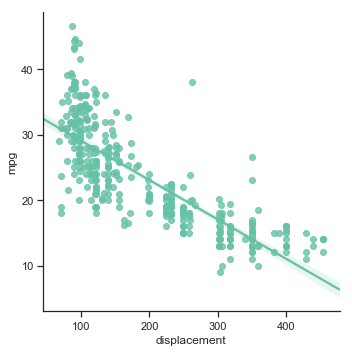

In [26]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

# 1. Fuel consumption and displacement (engine size)
# Linear Fitted line
sns.lmplot("displacement", "mpg", data);

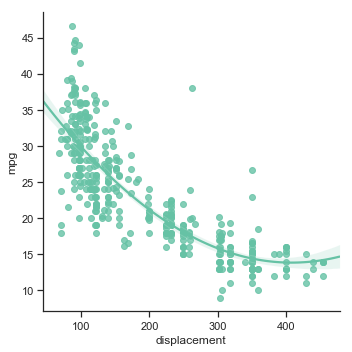

In [27]:
# Non-linear Curve
sns.lmplot("displacement", "mpg", data, order=2);

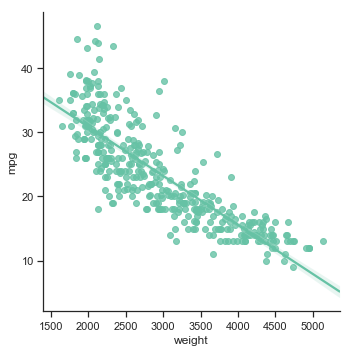

In [28]:
# 2. Fuel consumption and weight
# Linear Fitted line
sns.lmplot("weight","mpg",data);

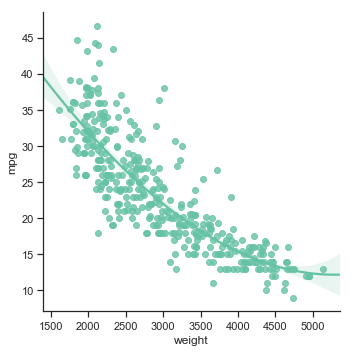

In [29]:
# Non-linear Curve
sns.lmplot("weight","mpg",data, order=3);

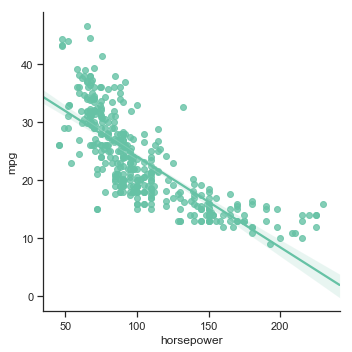

In [30]:
# 3. Fuel consumption and horsepower (HP)
# Linear Fitted line
sns.lmplot("horsepower","mpg", data);

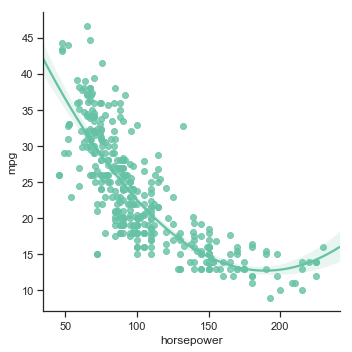

In [31]:
# Non-linear Curve
sns.lmplot("horsepower","mpg", data, order = 2);

### For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?

## Solution

4. There is a negative linear (better with order 2) correlation between mpg and displacement 
5. There is a negative linear (better with order 3) correlation between mpg and weight 
6. There is a negative non-linear (better with order 2) correlation between mpg and horsepower 

Note: Please see solutions from previous question for better graphical explanations

### Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

In [32]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan']);
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,Country_code
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,USA


Yes, the vehicles did get more efficient over the years 
because we can see the upward trend from the box plot


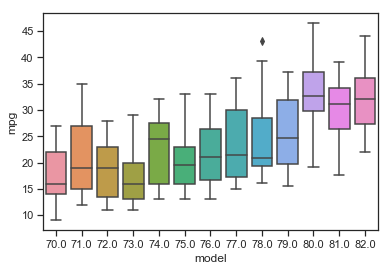

In [33]:
# 7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?

# Make a data frame first before feed it into the boxplot 
# (Parameter) data : DataFrame, array, or list of arrays 

df = pd.DataFrame();
df['model'] = np.array(data['model']);  # the year of the car
df['mpg'] = np.array(data['mpg']); 

# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="model", y="mpg", data=df);

print("Yes, the vehicles did get more efficient over the years ")
print("because we can see the upward trend from the box plot")

Yes, the Japanese cars are more fuel efficient than American or European ones


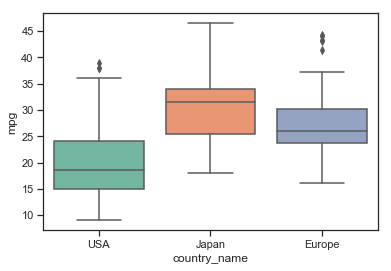

In [34]:
# 8. Are Japanese cars more fuel efficient than American or European ones?

df['country_name'] = np.array(data['Country_code']); 
ax = sns.boxplot(x="country_name", y="mpg", data=df);

print("Yes, the Japanese cars are more fuel efficient than American or European ones")